In [2]:
#pip install --upgrade scipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy.optimize import minimize
import numpy as np
import sympy as sp
from sympy import symbols, summation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from shapely.geometry import LineString


### From F1 Analysis

- SOFT 0.010632527089783267 -0.20480955237358175 99.32181409958719
- MEDIUM 0.01373902477042166 -0.5445335863621549 103.66638621613211
- HARD 0.009342750556306952 -0.49584233521158183 105.26568511257031

In [4]:
def soft_tyre_age(x):
    a = 0.010632527089783267
    b = -0.20480955237358175
    c = 99.32181409958719
    return a * x ** 2 + b * x + c

def medium_tyre_age(x):
    a = 0.01373902477042166
    b = -0.5445335863621549
    c = 103.66638621613211
    return a * x ** 2 + b * x + c

def hard_tyre_age(x):
    a = 0.009342750556306952
    b = -0.49584233521158183
    c = 105.26568511257031
    return a * x ** 2 + b * x + c

# Using Excel Analysis, the Tyres are already warmed up
def soft_tyre_age_pit(x):
    a = 0.010632527089783267
    b = -0.20480955237358175
    c = 99.32181409958719
    return a * (x+2) ** 2 + b * (x+2) + c

def medium_tyre_age_pit(x):
    a = 0.01373902477042166
    b = -0.5445335863621549
    c = 103.66638621613211
    return a * (x+9) ** 2 + b * (x+9) + c

def hard_tyre_age_pit(x):
    a = 0.009342750556306952
    b = -0.49584233521158183
    c = 105.26568511257031
    return a * (x+11) ** 2 + b * (x+11) + c

In [5]:
x = np.linspace(0, 50, 400)

soft_y = soft_tyre_age(x)
medium_y = medium_tyre_age(x)
hard_y = hard_tyre_age(x)

soft_pit_y = soft_tyre_age_pit(x)
medium_pit_y = medium_tyre_age_pit(x)
hard_pit_y = hard_tyre_age_pit(x)

In [6]:
trace_soft = go.Scatter(
    x = x,
    y = soft_y,
    mode = 'lines',
    name = 'Soft Tyre',
    line = dict(color='red')
)

trace_medium = go.Scatter(
    x = x,
    y = medium_y,
    mode = 'lines',
    name = 'Medium Tyre',
    line = dict(color='yellow')
)

trace_hard = go.Scatter(
    x = x,
    y = hard_y,
    mode = 'lines',
    name = 'Hard Tyre',
    line = dict(color='white')
)

trace_pit_soft = go.Scatter(
    x = x,
    y = soft_pit_y,
    mode = 'lines',
    name = 'Soft Tyre (Pit)',
    line = dict(color='darkred')
)

trace_pit_medium = go.Scatter(
    x = x,
    y = medium_pit_y,
    mode = 'lines',
    name = 'Medium Tyre (Pit)',
    line = dict(color='lightyellow')
)

trace_pit_hard = go.Scatter(
    x = x,
    y = hard_pit_y,
    mode = 'lines',
    name = 'Hard Tyre (Pit)',
    line = dict(color='grey')
)


layout = go.Layout(
    title='Lap Time vs. Tyre Age - Singapore Grand Prix',
    xaxis=dict(title='Tyre Age (laps)'),
    yaxis=dict(title='Lap Time (seconds)'),
    hovermode='closest',
    template="plotly"
)

fig = go.Figure(data=[trace_soft, trace_medium, trace_hard, trace_pit_soft, trace_pit_medium, trace_pit_hard], layout=layout)

fig.show()


- Expansion of Formulas 

In [7]:
# Define the symbols
L, x = symbols('L x')

# Define the equations
J_soft = summation(soft_tyre_age(x), (x, 1, L))
J_med = summation(medium_tyre_age(x), (x, 1, L))
J_hard = summation(hard_tyre_age(x), (x, 1, L))

J_pit_soft = summation(soft_tyre_age_pit(x), (x, 1, L))
J_pit_med = summation(medium_tyre_age_pit(x), (x, 1, L))
J_pit_hard = summation(hard_tyre_age_pit(x), (x, 1, L))

# print(f'Summation Equation for Soft Tyres (Start): {J_soft}')
print(f'Summation Equation for Medium Tyres (Start): {J_med}')
# print(f'Summation Equation for Hard Tyres (Start): {J_hard}')
print(f'Summation Equation for Soft Tyres (Pit): {J_pit_soft}')
print(f'Summation Equation for Medium Tyres (Pit): {J_pit_med}')
print(f'Summation Equation for Hard Tyres (Pit): {J_pit_hard}')

Summation Equation for Medium Tyres (Start): 0.00457967492347389*L**3 - 0.265397280795867*L**2 + 103.396409260413*L
Summation Equation for Soft Tyres (Pit): 0.00354417569659442*L**3 - 0.0758234584623327*L**2 + 98.8753574690402*L
Summation Equation for Medium Tyres (Pit): 0.00457967492347389*L**3 - 0.141746057862072*L**2 + 99.7321192124913*L
Summation Equation for Hard Tyres (Pit): 0.00311425018543565*L**3 - 0.140479536208261*L**2 + 100.798298456162*L


# Optimization Function

## Strategy 1: Medium-Hard Strategy

### Minimize
- Medium Tyres (Start)
- Hard Tyres (Pit)

$$
\begin{align*}
f(L) &= 0.00457967492347389*L^3 - 0.265397280795867*L^2 + 103.396409260413*L \\
&\quad + 0.00311425018543565*(62-L)^3 - 0.140479536208261*(62-L)^2 + 100.798298456162*(62-L)
\end{align*}
$$



### Set 1st Derivative to 0 and Solve for L

$$
\begin{align*}
1st Derivative = 0 \\
& \dfrac{196874545L^2}{14329586582}-\dfrac{34765117L}{65496370}+\dfrac{77645822\left(62-L\right)}{276359903}-\dfrac{4655333\left(62-L\right)^2}{498282917}+\dfrac{883064541013407}{339887174776591} = 0
\end{align*}
$$

- Solve for the Root L (Positive Root Only)

$
L = 
$

In [8]:
def R1(L, P1="P"):
    term1 = 0.00457967492347389*L**3 - 0.265397280795867*L**2 + 103.396409260413*L
    pit1 = 30
    term2 = 0.00311425018543565*(62-L)**3 - 0.140479536208261*(62-L)**2 + 100.798298456162*(62-L)
    if P1 == "S":
        pit1 = 0
    elif P1 == "V":
        pit1 = 20
        
    return term1 + pit1 + term2

# Initial guess
x0_single = np.array([0])

# Bounds for L
bounds_single = [(0, 62)]

# Minimize the new function with constraints
res_single = minimize(R1, x0_single, bounds=bounds_single, method='SLSQP')

In [9]:
res_single.x # Optimal Lap to Pit

array([32.47334653])

In [10]:
res_single.fun # Total Race Time

6198.516537322994

In [11]:
R1(32)

6198.587194794828

In [34]:
R1(20, "S")

6214.857873303693

In [13]:
R1(32,"P")

6198.587194794828

## Strategy 2: Medium-Hard-Medium Strategy

### Minimize

$$
\begin{align*}
f(L) &= 0.0012395555334842*L_1^3 - 0.0266016596949861*L_1^2 + 98.7713860989166*L_1 \\
&\quad + 0.0012395555334842*L_1^3 - 0.0266016596949861*L_1^2 + 98.7713860989166*L_1 \\
&\quad + 0.0012395555334842*(62-L_1-L_2)^3 - 0.0266016596949861*(62-L_1-L_2)^2 + 98.7713860989166*(62-L_1-L_2) 
\end{align*}
$$

In [14]:
def R2(L1, L2, P1="P", P2="P"):
    term1 = 0.00457967492347389*L1**3 - 0.265397280795867*L1**2 + 103.396409260413*L1
    pit1 = 30
    term2 = 0.00311425018543565*L2**3 - 0.140479536208261*L2**2 + 100.798298456162*L2
    pit2 = 30
    term3 = 0.00311425018543565*(62-L1-L2)**3 - 0.140479536208261*(62-L1-L2)**2 + 100.798298456162*(62-L1-L2)
    
    if P1 == "S":
        pit1 = 0
    elif P1 == "V":
        pit1 = 20
        
    if P2 == "S":
        pit2 = 0
    elif P2 == "V":
        pit2 = 20
    
    return term1 + pit1 + term2 + pit2 + term3

# Define a wrapper function for R_correct_separate that takes a single argument (array of L1 and L2)
# This is needed because minimize function expects the function to have a single argument
def R_wrapper(L):
    L1, L2 = L
    return R2(L1, L2)

# Initial guess
x0 = np.array([30, 30])

# Bounds for L1 and L2
bounds = [(0, 62), (0, 62)] 

# Minimize the function with constraints
res = minimize(R_wrapper, x0, bounds=bounds, method='SLSQP')

In [15]:
res.x # Optimal Lap to Pit

array([25.43702314, 18.28181721])

In [16]:
res.fun # Total Race Time

6223.390994925971

In [17]:
R2(25, 19)

6223.425861370887

In [18]:
R2(20, 24)

6226.7173264939975

In [19]:
R2(20, 12, "S", "S")

6174.740750962279

## Strategy 3: Medium-Hard-usedSoft Strategy
Tire age of used soft taken to be 20.

In [20]:
def R3(L1, L2, P1="P", P2="P"):
    term1 = 0.00457967492347389*L1**3 - 0.265397280795867*L1**2 + 103.396409260413*L1
    pit1 = 30
    term2 = 0.00311425018543565*L2**3 - 0.140479536208261*L2**2 + 100.798298456162*L2
    pit2 = 30
    term3 = 0.00354417569659442*(62-L1-L2)**3 + 0.115562029153766*(62-L1-L2)**2 + 99.590651741486*(62-L1-L2)
    
    if P1 == "S":
        pit1 = 0
    elif P1 == "V":
        pit1 = 20
        
    if P2 == "S":
        pit2 = 0
    elif P2 == "V":
        pit2 = 20
    
    return term1 + pit1 + term2 + pit2 + term3

# Define a wrapper function for R_correct_separate that takes a single argument (array of L1 and L2)
# This is needed because minimize function expects the function to have a single argument
def R_wrapper(L):
    L1, L2 = L
    return R3(L1, L2)

# Initial guess
x0 = np.array([30, 30])

# Bounds for L1 and L2
bounds = [(0, 62), (0, 62)] 

# Minimize the function with constraints
res_3 = minimize(R_wrapper, x0, bounds=bounds, method='SLSQP')

In [21]:
res_3.x # Optimal Lap to Pit

array([31.36536194, 28.03235943])

In [22]:
res_3.fun # Total Race Time

6227.118240286575

In [23]:
R3(25, 19)

6287.153013265093

In [24]:
R3(20,22)

6307.528930826971

In [25]:
R3(20,24, "S", "V")

6250.444478388204

___________

### Plot curve for MH

In [26]:
R1_ls = np.linspace(0,62,63)

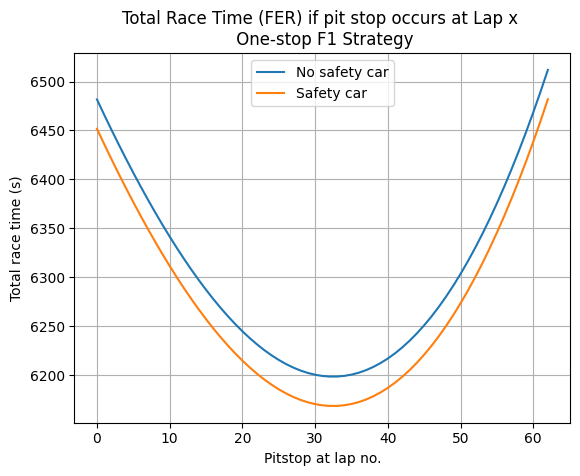

In [27]:
# Plot curve for MH
Y_p = R1(R1_ls, "P")
Y_s = R1(R1_ls, "S")

# Plot the graph
plt.plot(R1_ls, Y_p, label="No safety car")
plt.plot(R1_ls, Y_s, label="Safety car")
plt.xlabel('Pitstop at lap no.')
plt.ylabel('Total race time (s)')
plt.title('Total Race Time (FER) if pit stop occurs at Lap x \n One-stop F1 Strategy')
plt.grid(True)
plt.legend(["No safety car","Safety car"], loc="upper center")
plt.show()

### Plot heatmap for MHM

In [28]:
T1_ls = list(range(40))
T2_ls = list(range(40))

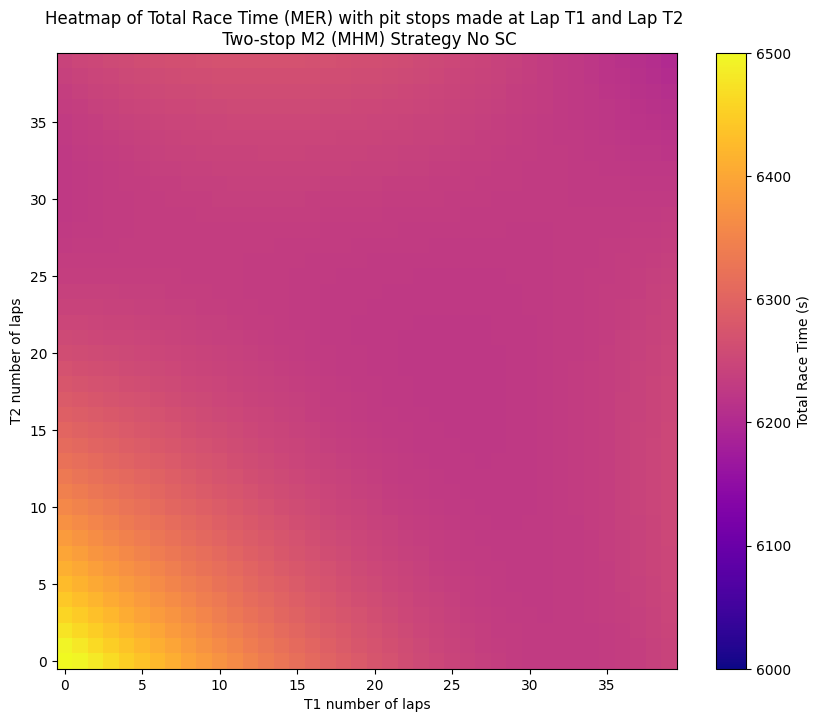

In [29]:
T1, T2 = np.meshgrid(T1_ls, T2_ls)

# Race time computation helper function
Z_p = R2(T1, T2, "P")

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.pcolormesh(T1, T2, Z_p, cmap='plasma')  
plt.colorbar(label='Total Race Time (s)')  
plt.clim(6000, 6500)
plt.xlabel('T1 number of laps')
plt.ylabel('T2 number of laps')
plt.title('Heatmap of Total Race Time (MER) with pit stops made at Lap T1 and Lap T2 \n Two-stop M2 (MHM) Strategy No SC')
plt.show()

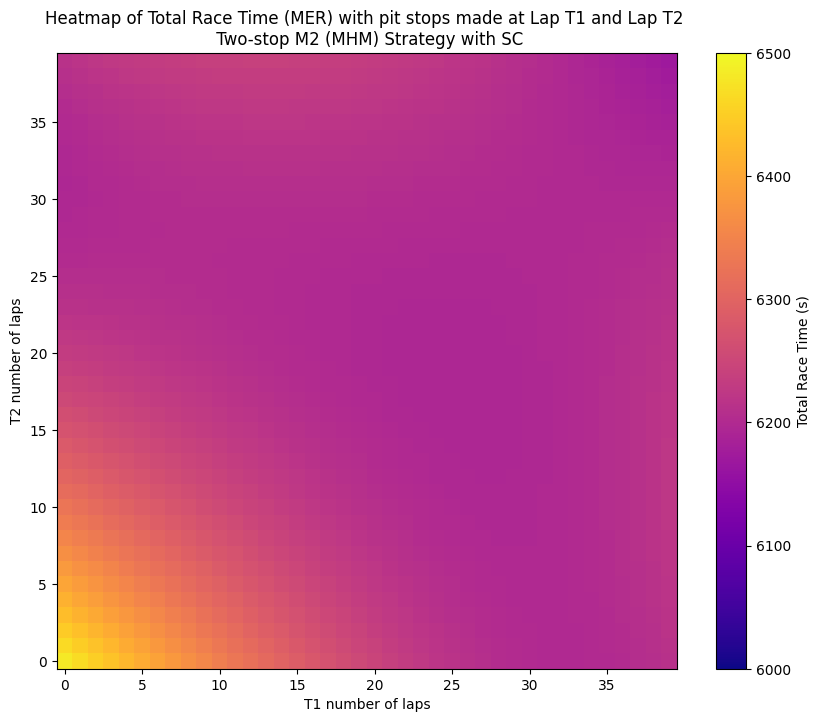

In [30]:
T1, T2 = np.meshgrid(T1_ls, T2_ls)

# Race time computation helper function
Z_s = R2(T1, T2, "S")

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.pcolormesh(T1, T2, Z_s, cmap='plasma')  
plt.colorbar(label='Total Race Time (s)')  
plt.clim(6000, 6500)
plt.xlabel('T1 number of laps')
plt.ylabel('T2 number of laps')
plt.title('Heatmap of Total Race Time (MER) with pit stops made at Lap T1 and Lap T2 \n Two-stop M2 (MHM) Strategy with SC')
plt.show()

Text(0.5, 0, 'Total race time (s)')

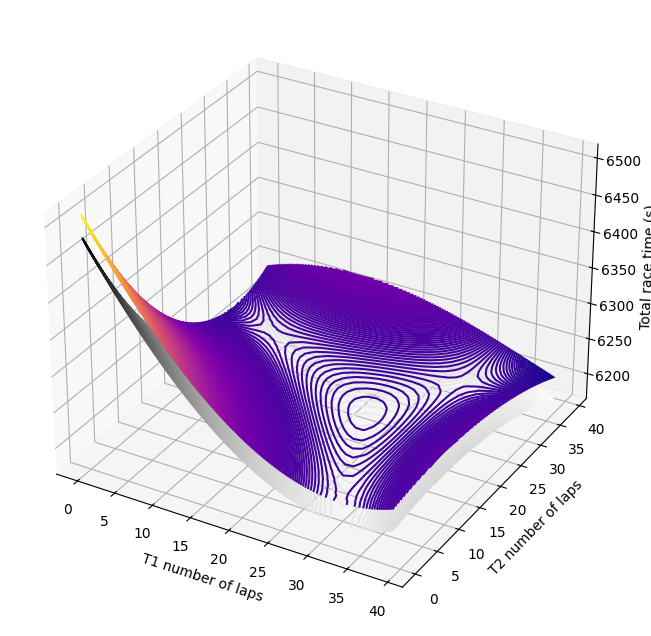

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(T1, T2, Z_p, 500, cmap='plasma')
ax.contour3D(T1, T2, Z_s, 500, cmap='binary')
ax.set_xlabel('T1 number of laps')
ax.set_ylabel('T2 number of laps')
ax.set_zlabel('Total race time (s)')

## Visual analysis

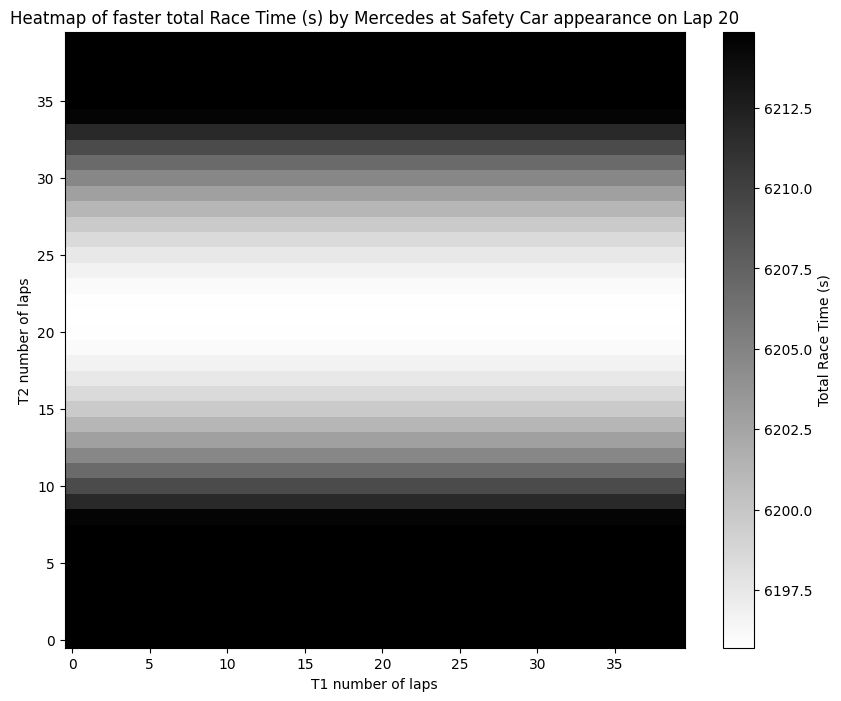

In [37]:
## If area is black: Ferrari MH strategy dominates Mercedes MHM strategy. Lighter areas otherwise.
## Consider the case where safety car came out at Lap 20, set R1(20)
T1, T2 = np.meshgrid(T1_ls, T2_ls)

# Race time computation helper function
Z = R2(20, T2, "S", "P")

num = 20
# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.pcolormesh(T1, T2, Z, cmap='binary', vmax=R1(num, "S"))  
plt.colorbar(label='Total Race Time (s)')  
# plt.axvline(x = num, color = 'b')
plt.xlabel('T1 number of laps')
plt.ylabel('T2 number of laps')
plt.title(f'Heatmap of faster total Race Time (s) by Mercedes at Safety Car appearance on Lap {num}')
plt.show()

## Case where MER pits at later durations of the race

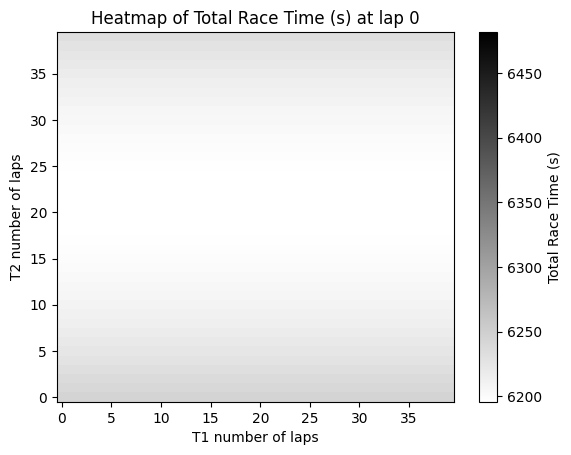

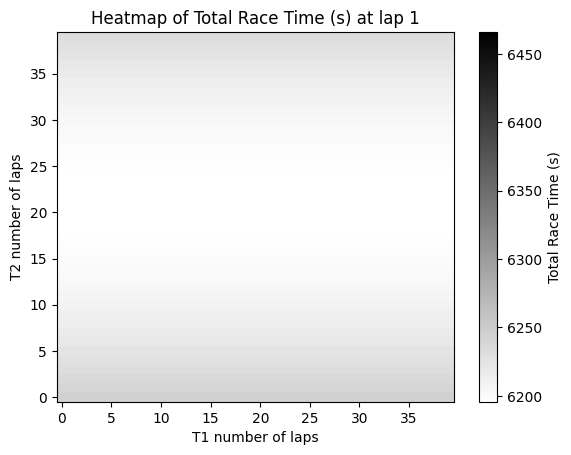

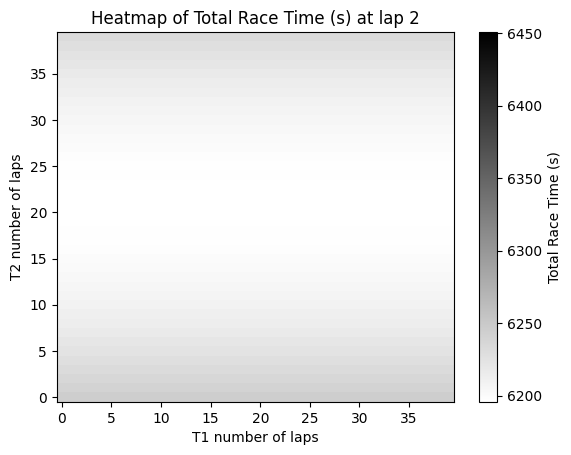

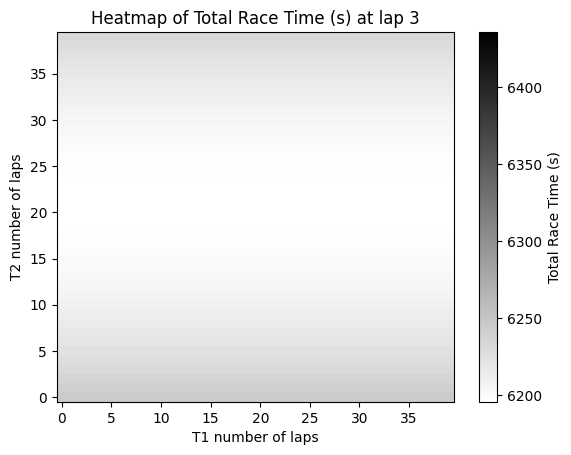

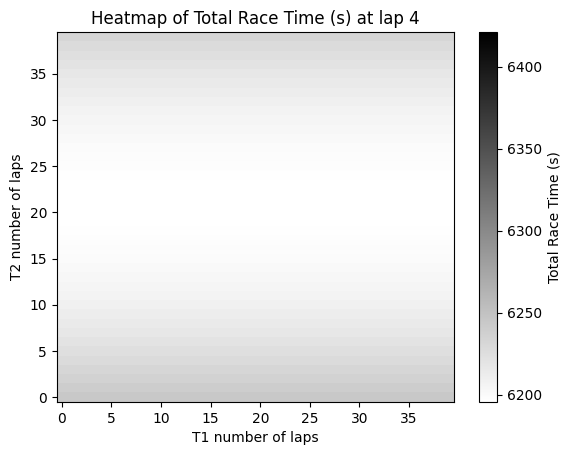

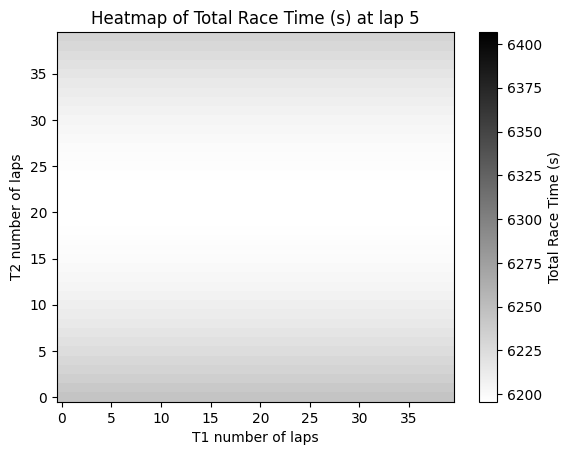

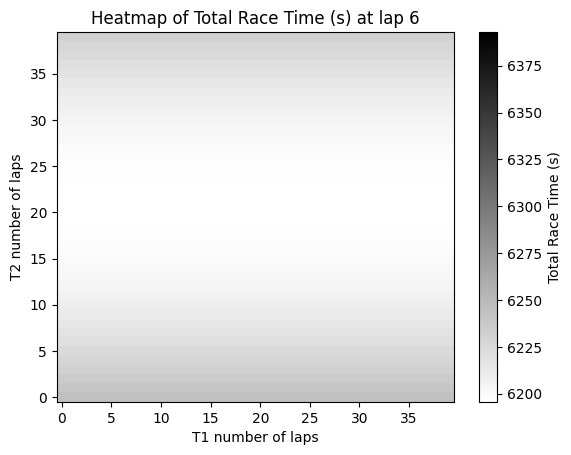

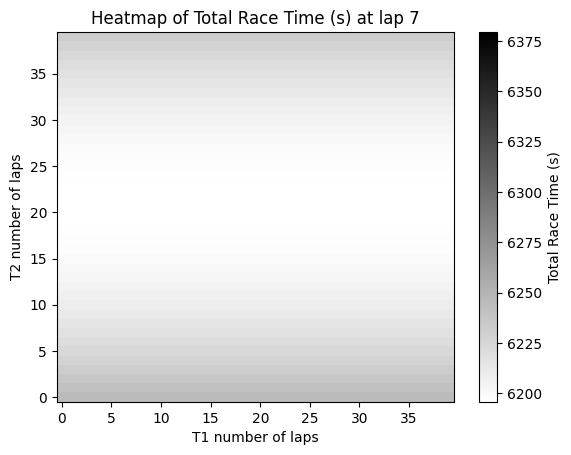

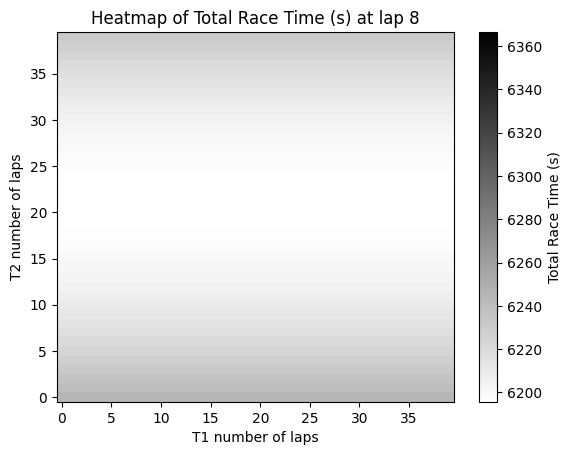

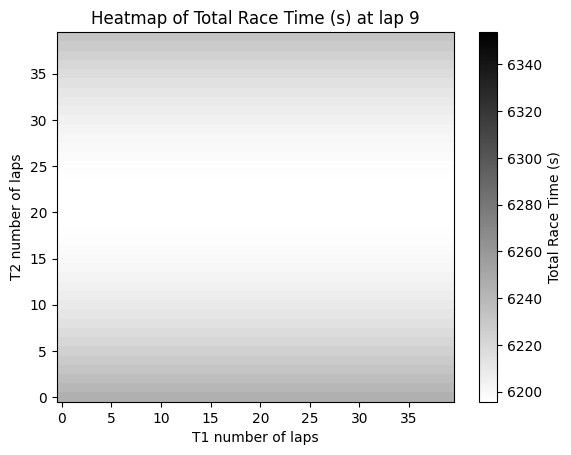

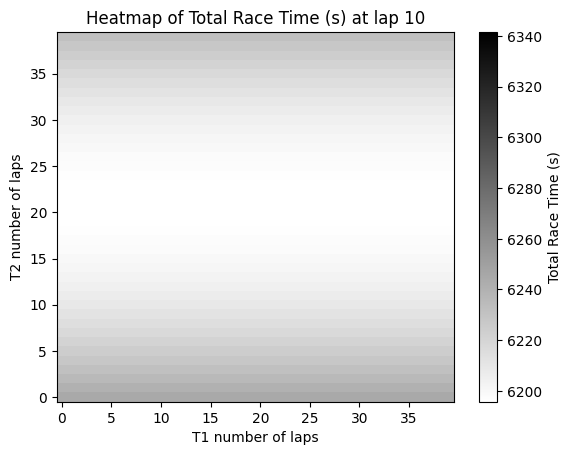

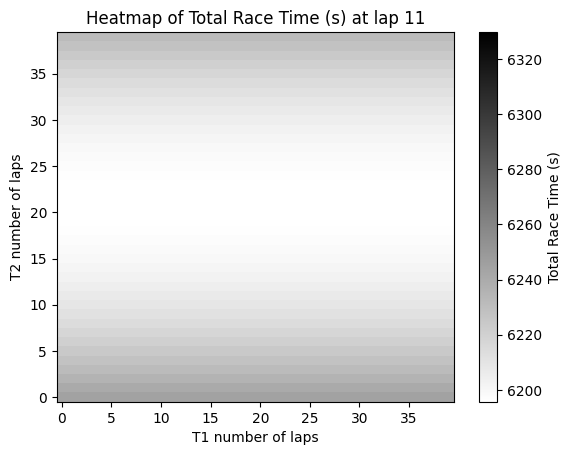

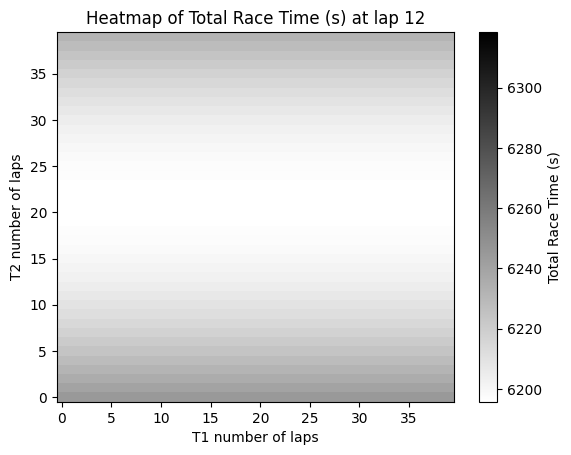

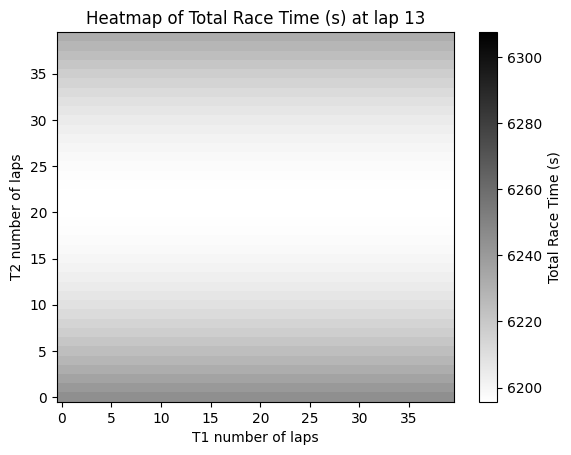

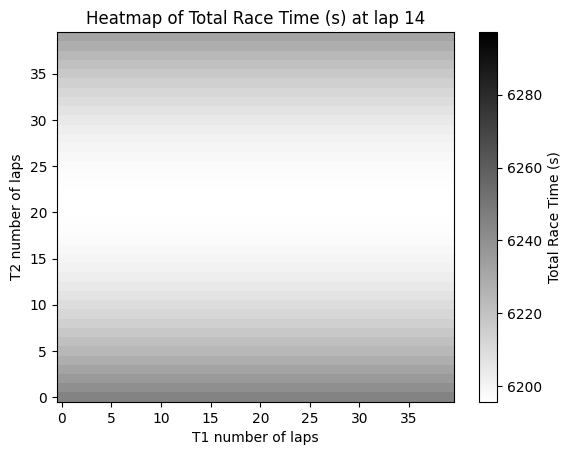

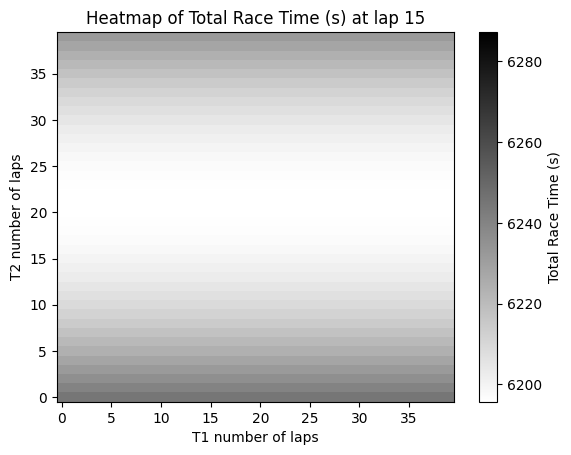

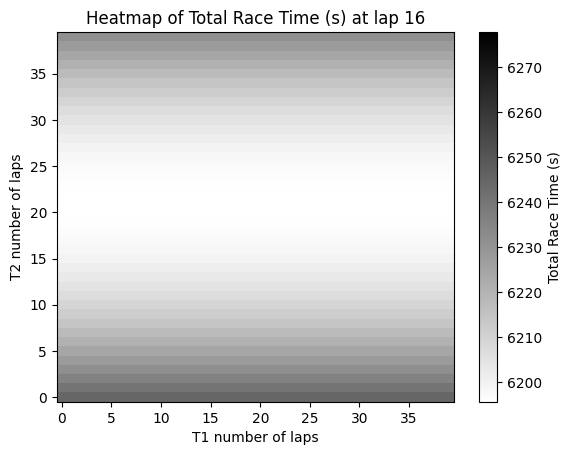

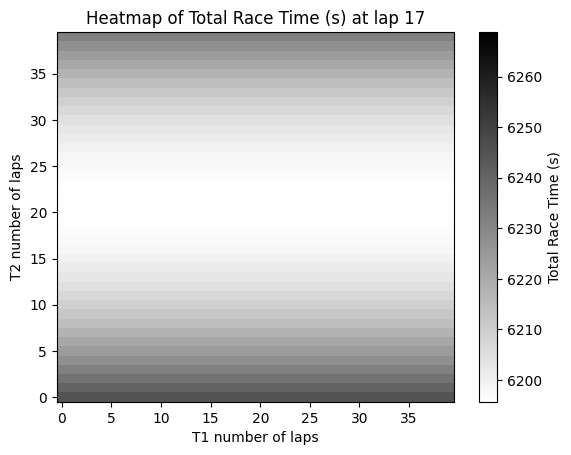

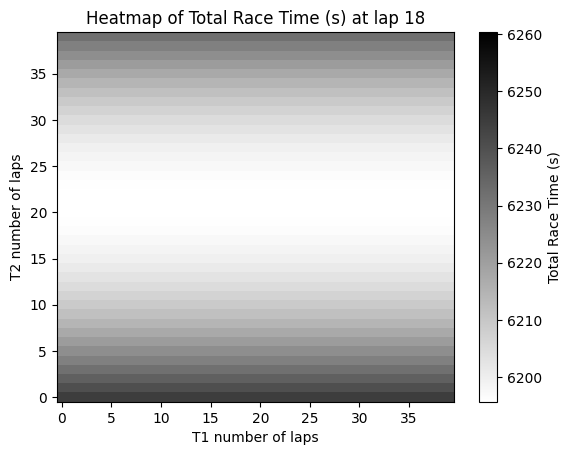

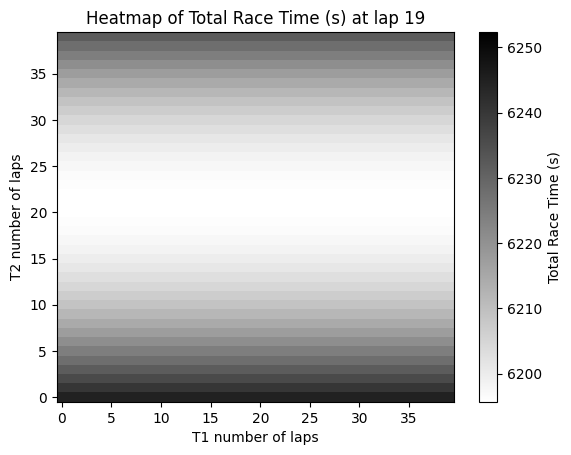

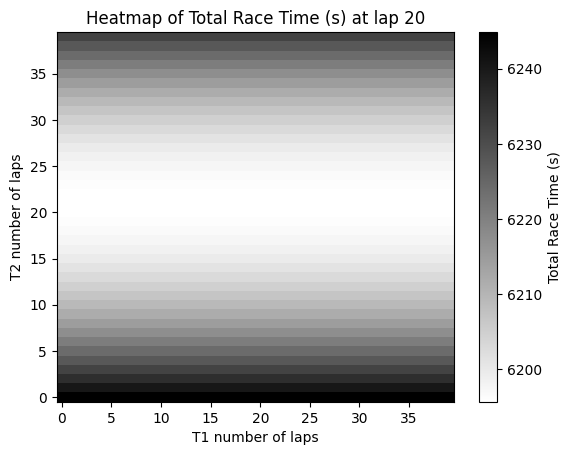

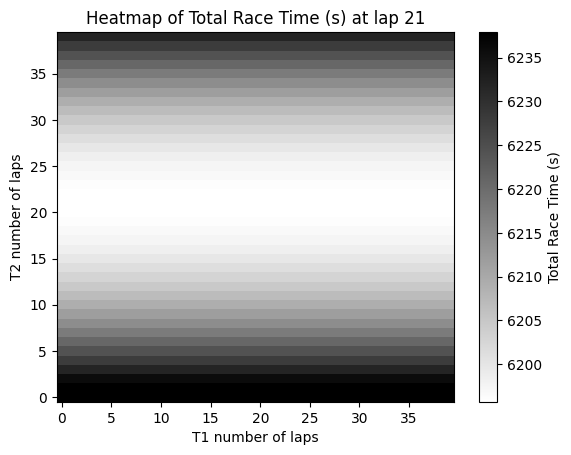

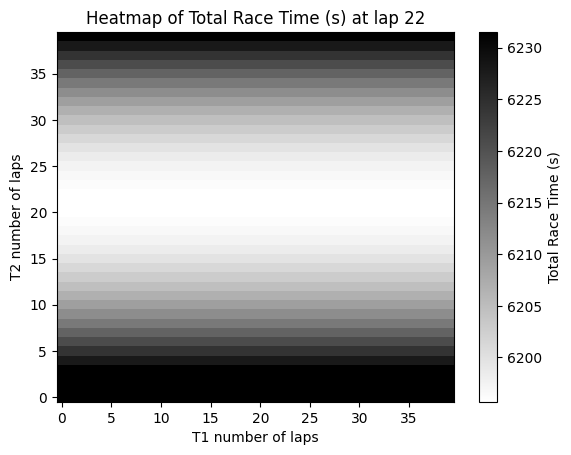

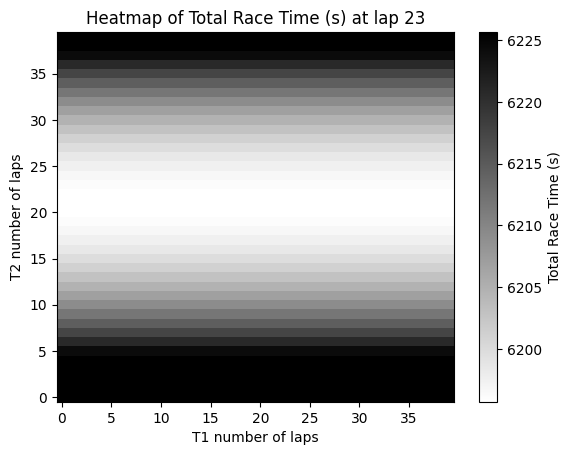

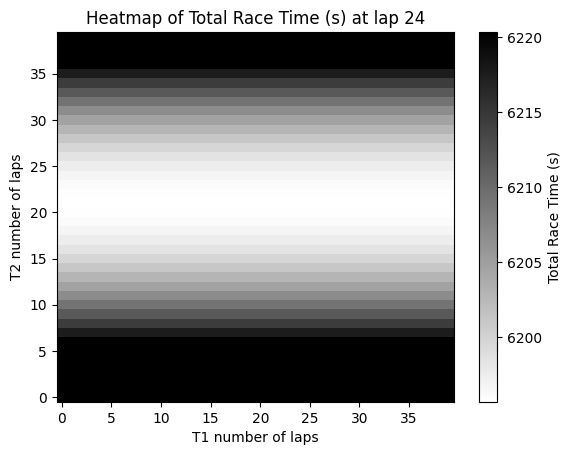

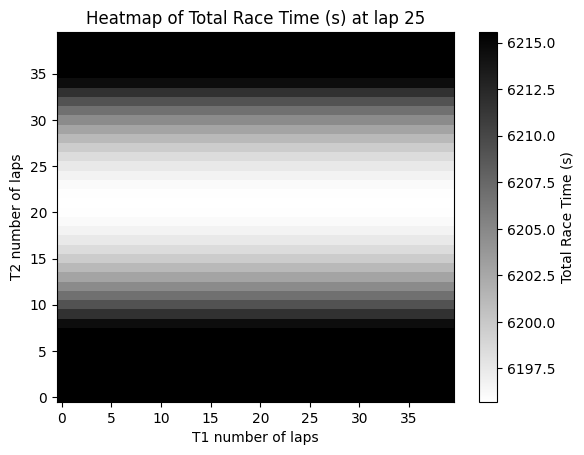

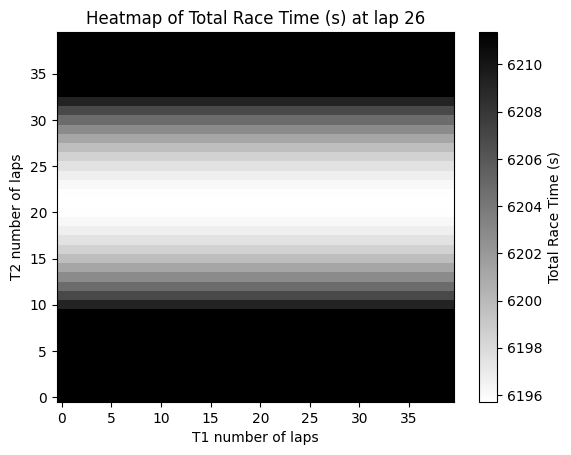

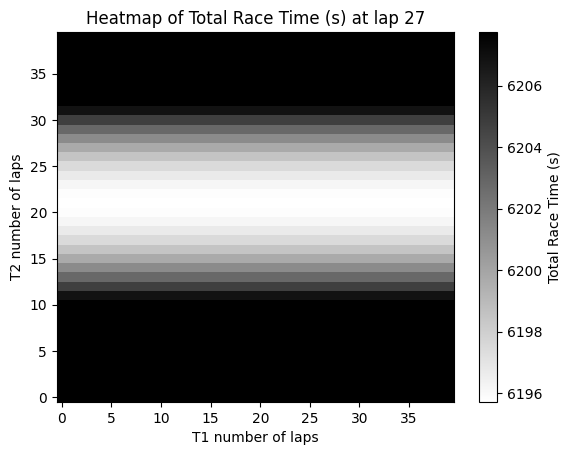

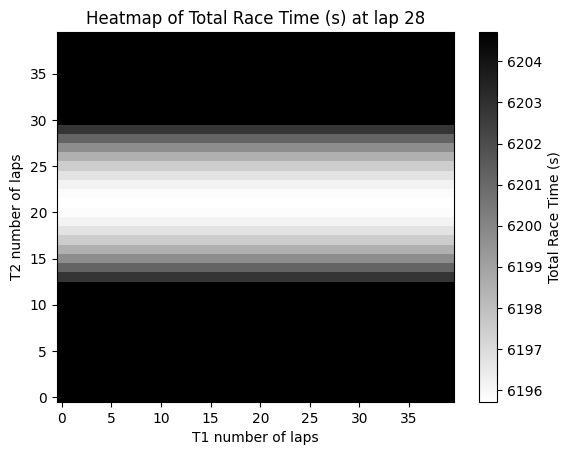

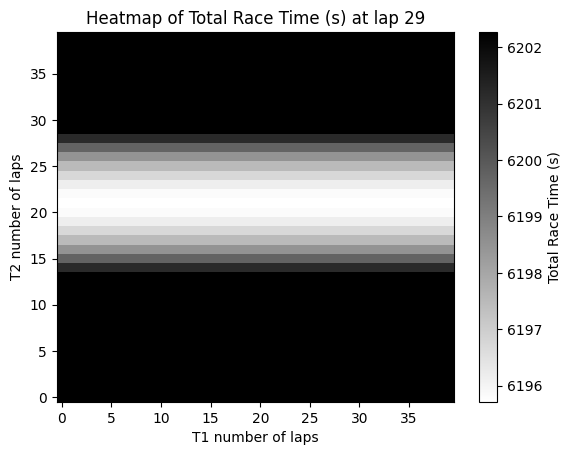

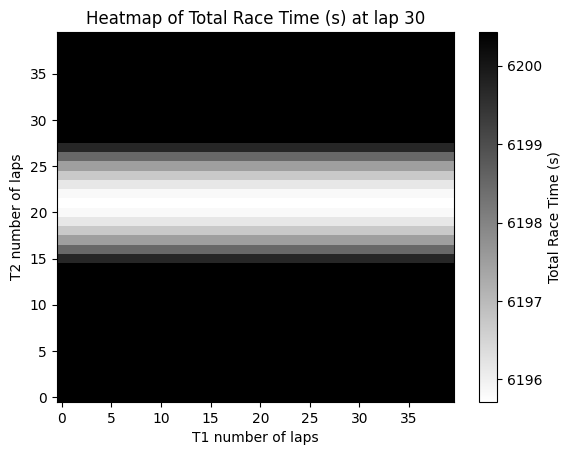

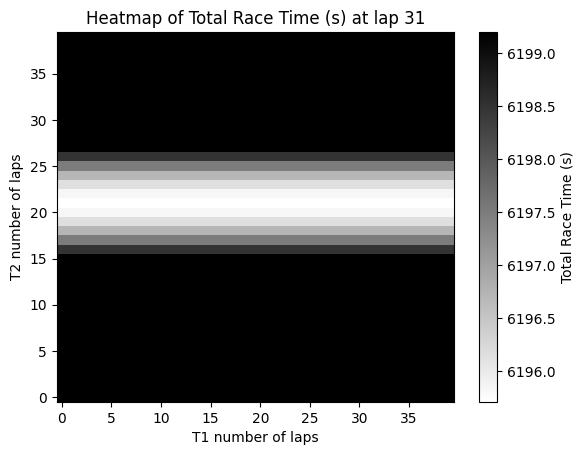

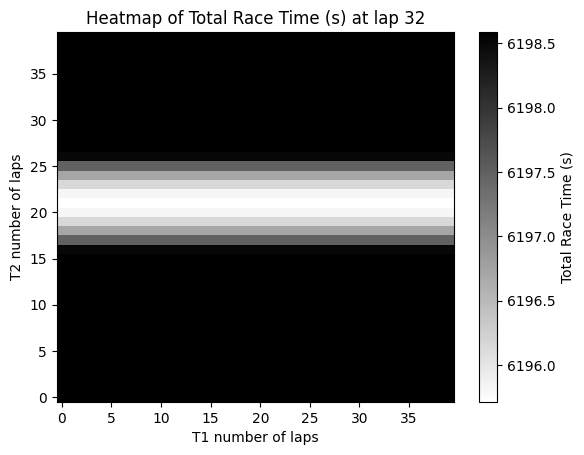

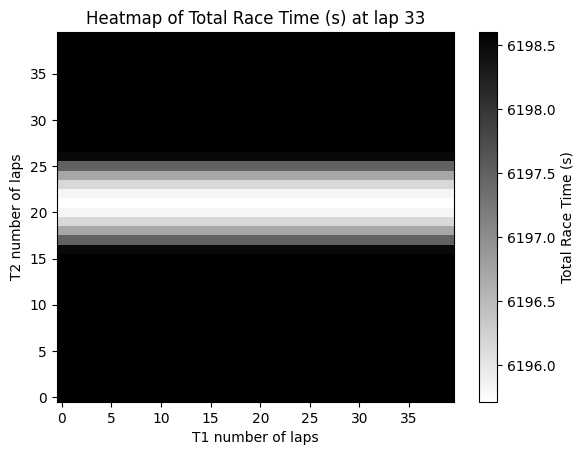

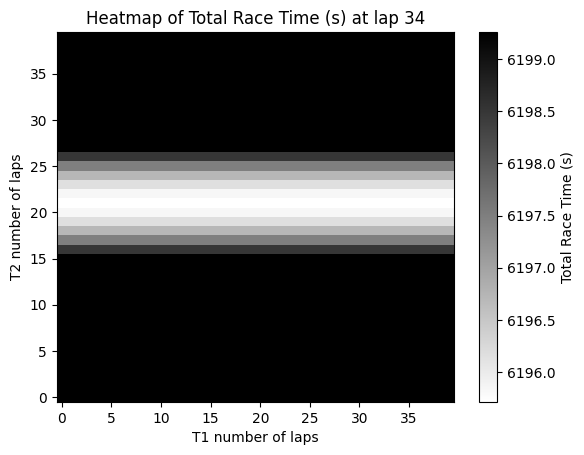

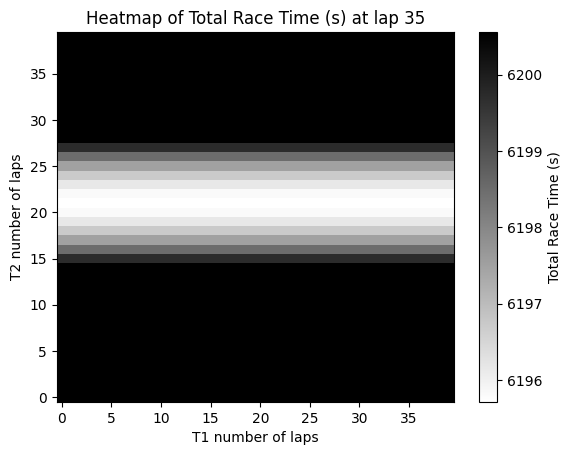

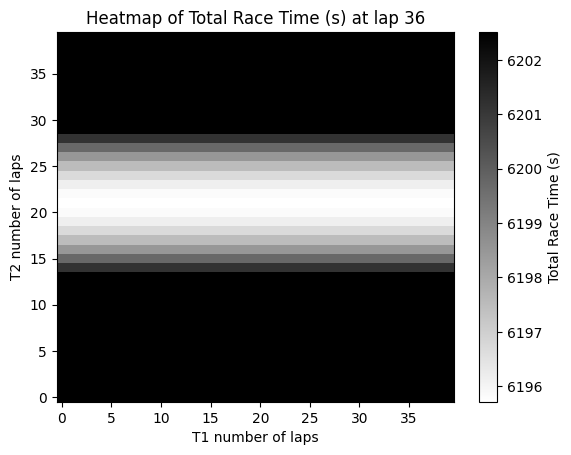

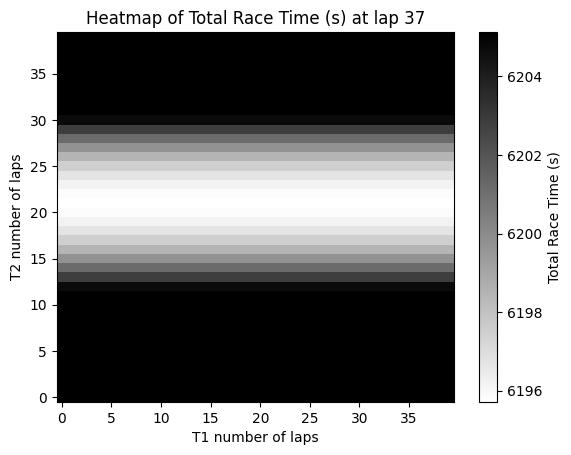

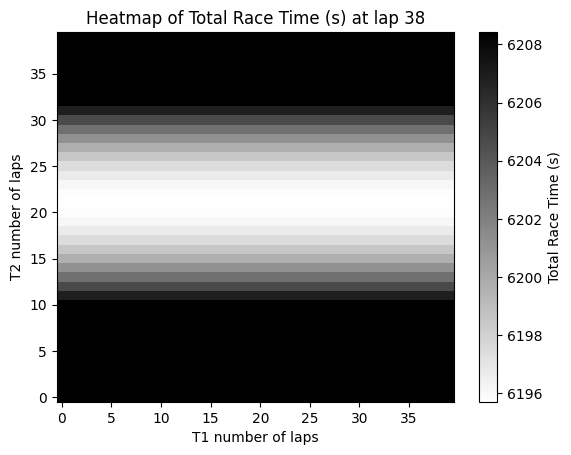

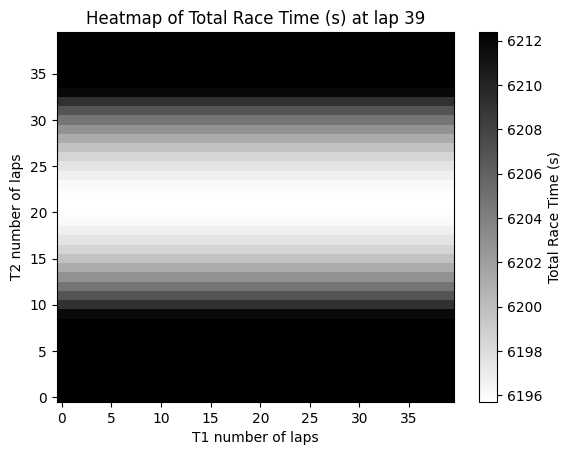

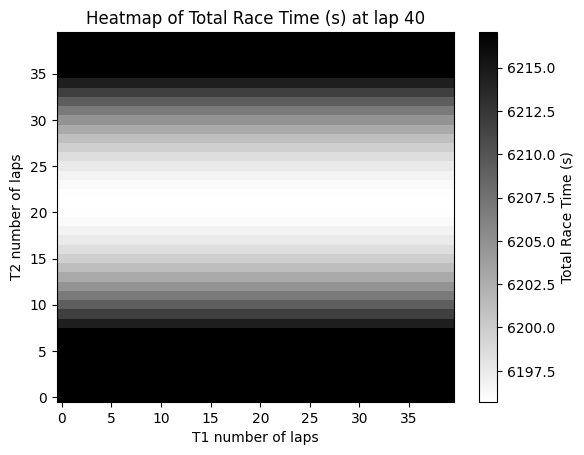

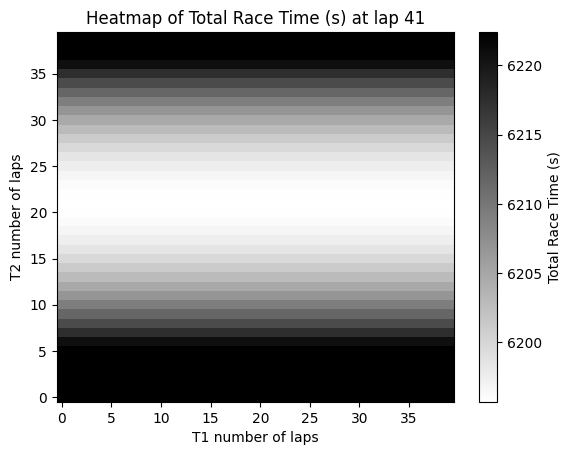

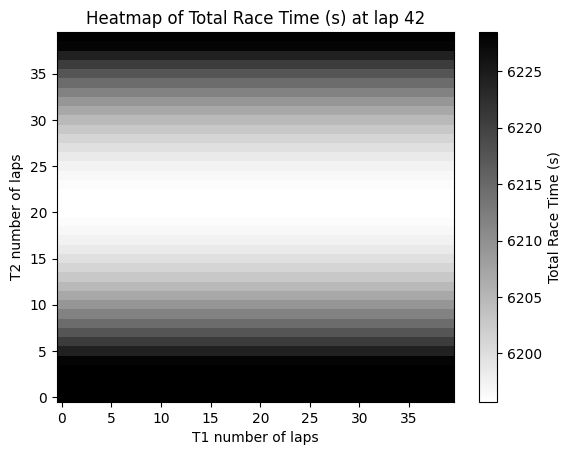

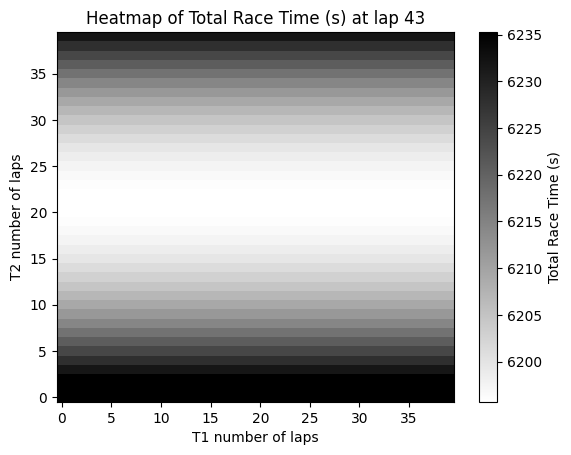

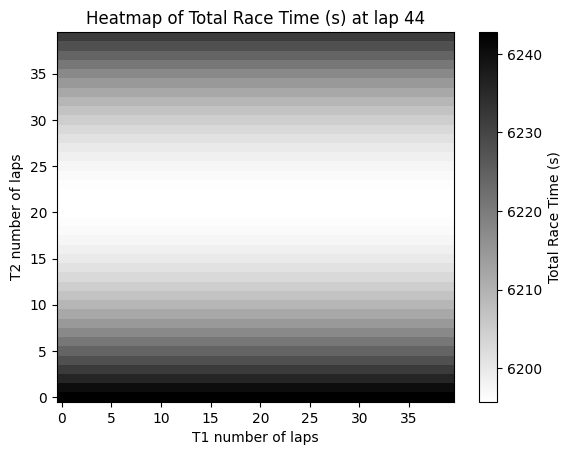

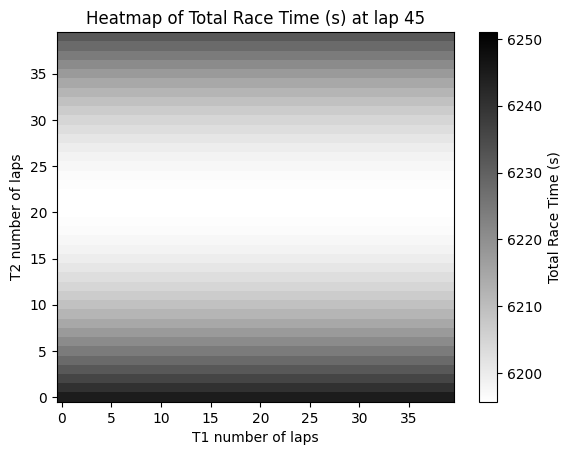

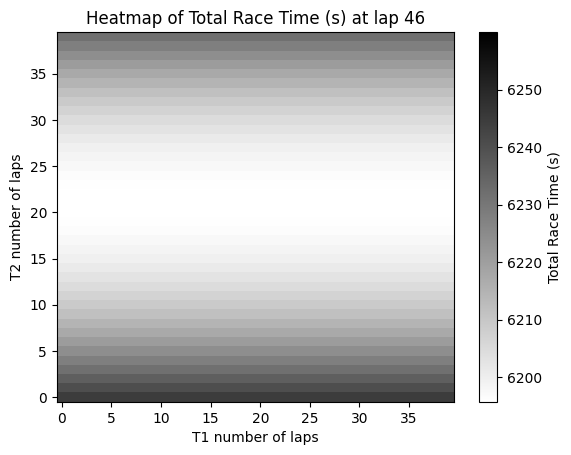

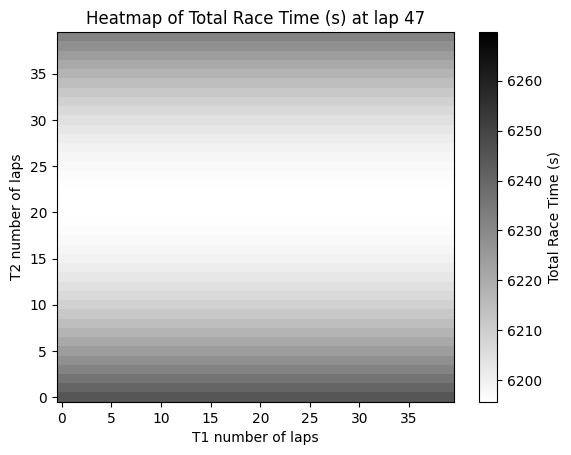

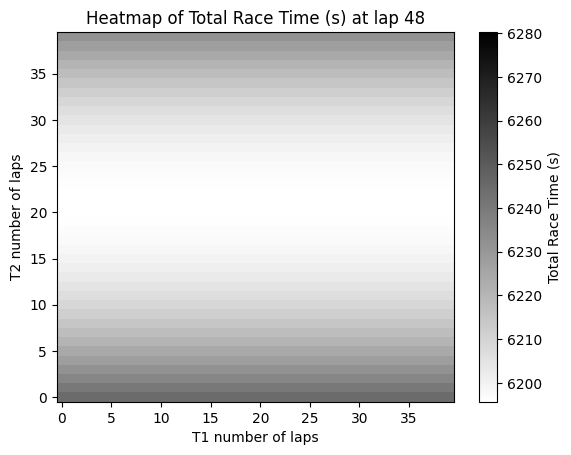

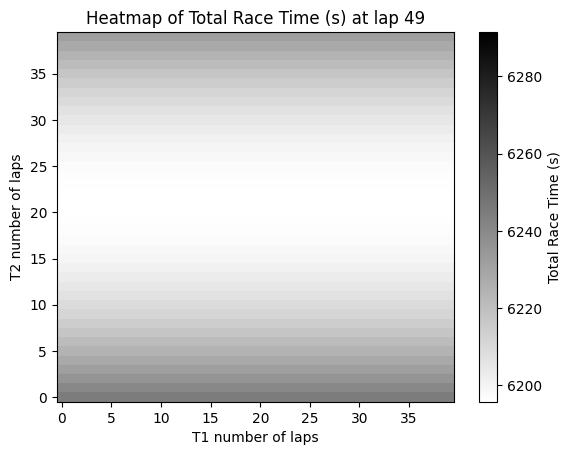

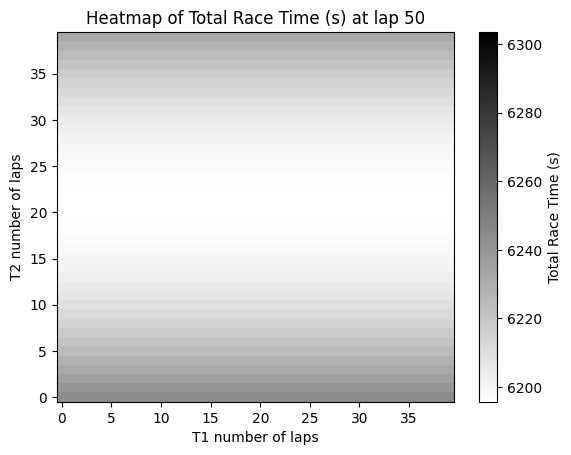

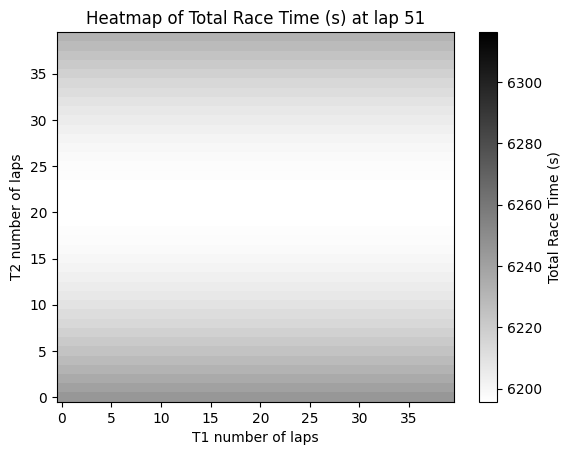

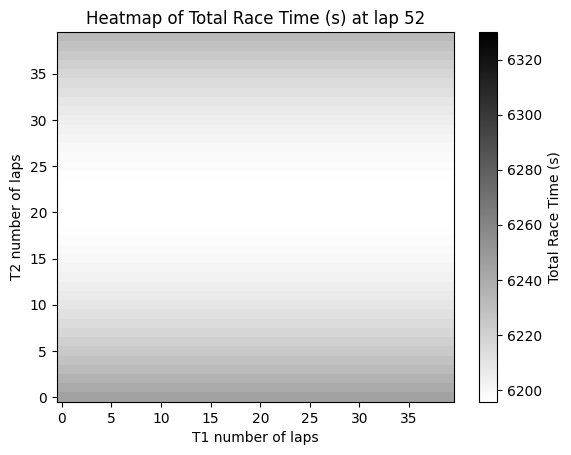

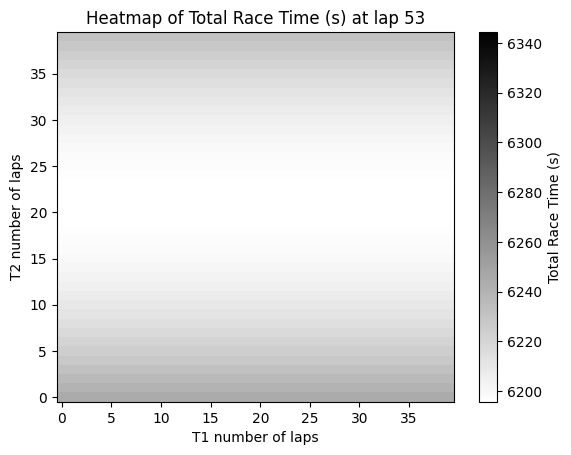

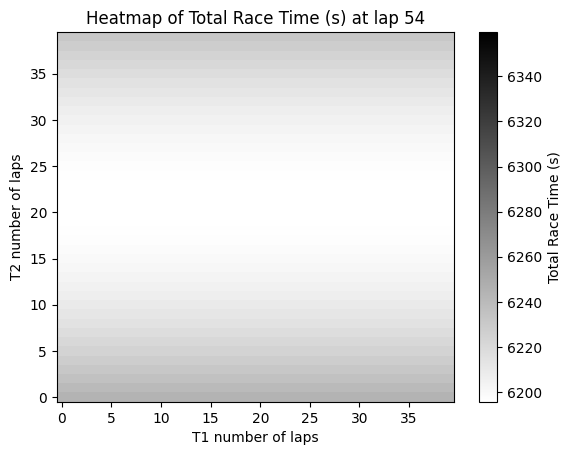

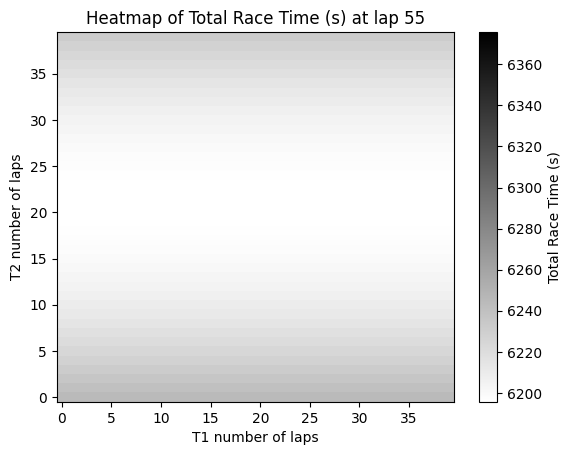

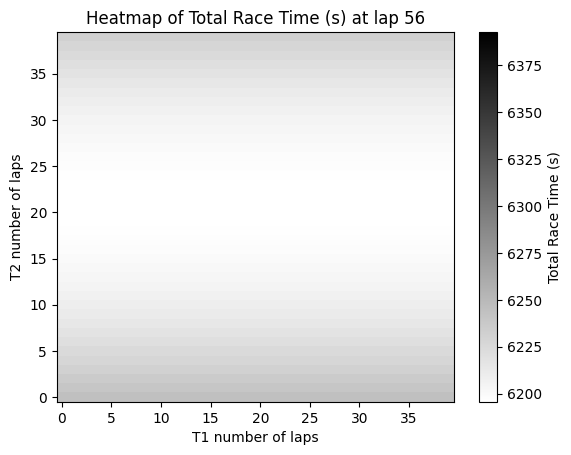

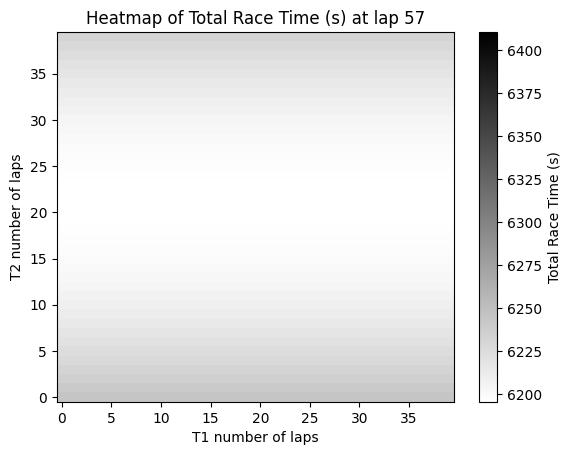

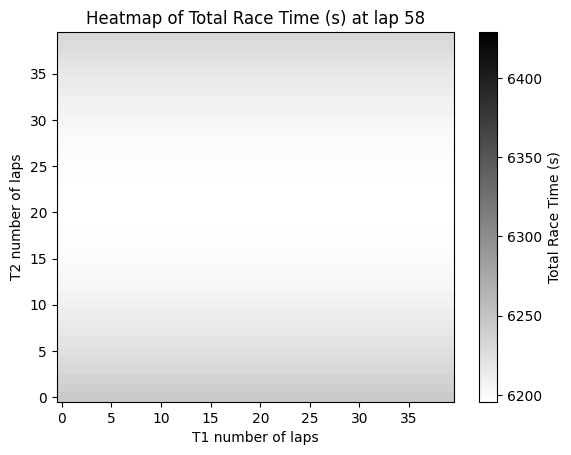

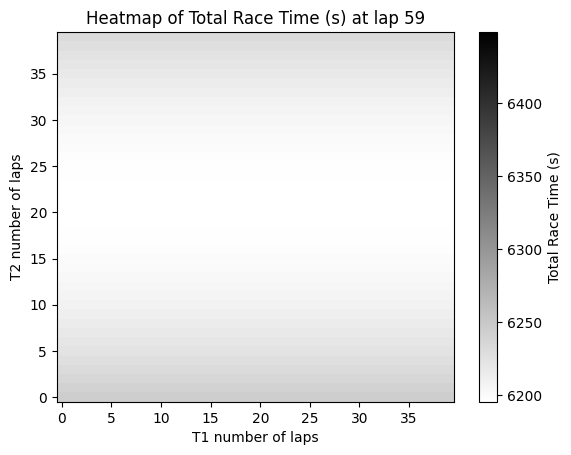

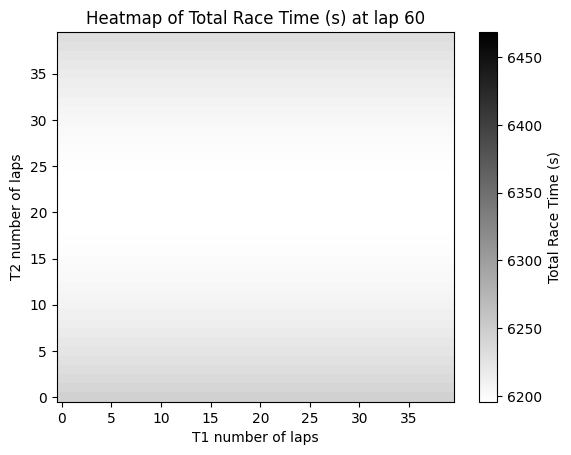

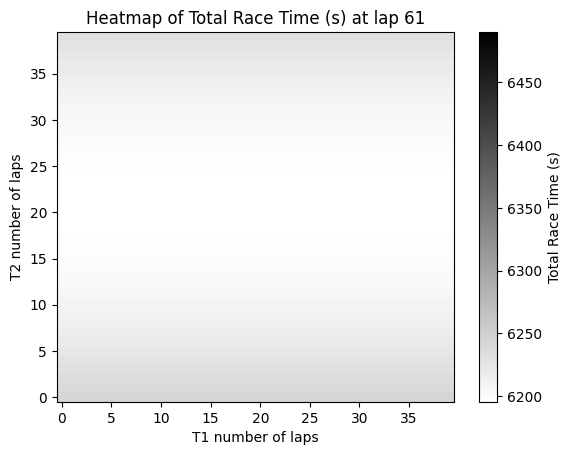

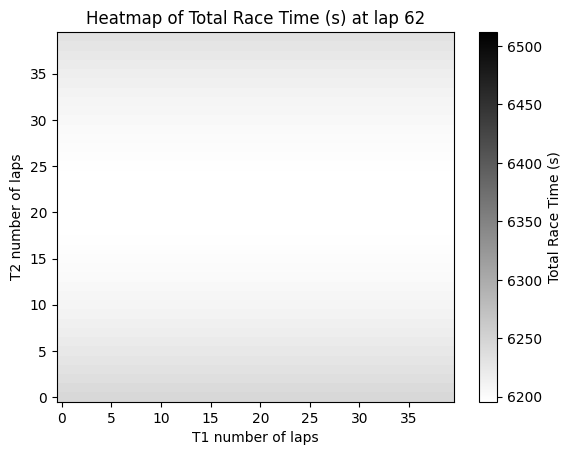

In [33]:
for i in range(63):
    ## If area is black: Ferrari MH strategy dominates Mercedes MHM strategy. Lighter areas otherwise.
    T1, T2 = np.meshgrid(T1_ls, T2_ls)

    # Race time computation helper function
    Z = R2(20, T2, "S", "P")

    # Plot the heatmap
    plt.pcolormesh(T1, T2, Z, cmap='binary', vmax=R1(i, "P"))  
    plt.colorbar(label='Total Race Time (s)') 
    plt.xlabel('T1 number of laps')
    plt.ylabel('T2 number of laps')
    plt.title(f'Heatmap of Total Race Time (s) at lap {i}')

    # Display the plot
    plt.show()